In [4]:
import pandas as pd
import numpy as np
import os
from glob import glob
import torch
from monai.transforms import (
    Compose,
    LoadImaged,
    ToTensord,
    EnsureChannelFirstd,
    Spacingd,
    ScaleIntensityRanged,
    CropForegroundd,
    Resized, 
    Orientationd
)
from monai.data import DataLoader, Dataset, DataLoader
from monai.utils import first
import matplotlib.pyplot as plt
from monai.utils import set_determinism

In [8]:
data = '/Users/vaidehitaraklad/Machine Learning/Jupyter/Projects/Liver Segmentation/niftifiles'

In [173]:
train_images = sorted(glob('/Users/vaidehitaraklad/Machine Learning/Jupyter/Projects/Liver Segmentation/niftifiles/images/*'))
train_labels = sorted(glob('/Users/vaidehitaraklad/Machine Learning/Jupyter/Projects/Liver Segmentation/niftifiles/labels/*'))

test_images = sorted(glob('/Users/vaidehitaraklad/Machine Learning/Jupyter/Projects/Liver Segmentation/niftifiles/images_test/*'))
test_labels = sorted(glob('/Users/vaidehitaraklad/Machine Learning/Jupyter/Projects/Liver Segmentation/niftifiles/labels_test'))

In [175]:
train_files = [{'image': image_name, 'label': label_name} for image_name, label_name in zip(train_images, train_labels)]
val_files = [{'image': image_name, 'label': label_name} for image_name, label_name in zip(test_images, test_labels)]

# print(train_files)

In [179]:
# load image
# apply transforms
# convert this into torch sensors
orig_transform = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        EnsureChannelFirstd(keys = ['image', 'label']),
        ToTensord(keys = ['image', 'label'])
    ]
)
train_transform = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        EnsureChannelFirstd(keys=['image', 'label']),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 1.0), mode=('bilinear', 'nearest')),
        ScaleIntensityRanged(keys=['image'], a_min=-200, a_max = 200, b_min = 0.0, b_max = 1.0, clip = True),
        CropForegroundd(keys=['image', 'label'], source_key='image'),
        Resized(keys=['image', 'label'], spatial_size=[128, 128, 64]),
        ToTensord(keys=['image', 'label'])
    ]
)
val_transform = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        EnsureChannelFirstd(keys=['image', 'label']),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 1.0), mode=('bilinear', 'nearest')),
        ScaleIntensityRanged(keys=['image'], a_min=-200, a_max = 200, b_min = 0.0 , b_max = 1.0, clip=True),
        CropForegroundd(keys=['image', 'label'], source_key='image'),
        Resized(keys=['image', 'label'], spatial_size=[128, 128, 64]),
        ToTensord(keys=['image', 'label'])
    ]
)

/opt/anaconda3/lib/python3.12/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


In [181]:
# creating dataset after applying transform automatically
orig_ds = Dataset(data = train_files, transform = orig_transform)
orig_loader = DataLoader(orig_ds, batch_size = 1)

train_ds = Dataset(data = train_files, transform = train_transform)
train_loader = DataLoader(train_ds, batch_size = 1)

val_ds = Dataset(data = val_files, transform = val_transform)
val_loader = DataLoader(val_ds, batch_size = 1)

In [183]:
# this will load the first image from train loader
orig_patient = first(orig_loader)
test_patient = first(train_loader)
# print(test_patient['image'])

In [184]:
print(torch.min(test_patient['image']))
print(torch.max(test_patient['image']))

metatensor(0.)
metatensor(1.)


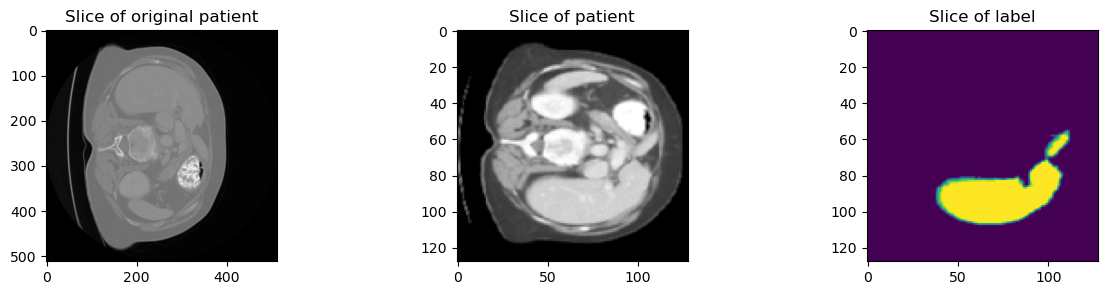

In [187]:
plt.figure('test',(15,3))

# c : foreground or background created by dataloader
# b = 0 because only 1 batch size
# c = 0 because only one channel in image 
# w : whole width of image
# h : whole height of image
# s - 55th slice from total of 64

plt.subplot(1,3,1)
plt.title('Slice of original patient')
plt.imshow(orig_patient['image'][0, 0, :, :, 55], cmap = 'gray')

# orienation will change the direction therefore preprocessed image is inverted
plt.subplot(1,3,2)
plt.title('Slice of patient')
plt.imshow(test_patient['image'][0, 0, :, :, 55], cmap = 'gray')

plt.subplot(1,3,3)
plt.title('Slice of label')
plt.imshow(test_patient['label'][0, 0, :, :, 55])


In [11]:
def prepare(data_dir, ):
    train_images = sorted(glob(os.path.join(data_dir, 'images/*')))
    train_labels = sorted(glob(os.path.join('labels','labels/*')))

    test_images = sorted(glob(os.path.join(data_dir, 'images_test/*')))
    test_labels = sorted(glob(os.path.join(data_dir, 'labels_test/*')))
    # creating dictionary for each img and label path
    train_files = [{'image': image_name, 'label': label_name} for image_name, label_name in zip(train_images, train_labels)]
    val_files = [{'image': image_name, 'label': label_name} for image_name, label_name in zip(test_images, test_labels)]
    # print(train_files)

    train_transform = Compose(
        [
            LoadImaged(keys=['image', 'label']),
            EnsureChannelFirstd(keys=['image', 'label']),
            Orientationd(keys=["image", "label"], axcodes="RAS"),
            Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 1.0), mode=('bilinear', 'nearest')),
            ScaleIntensityRanged(keys=['image'], a_min=-200, a_max = 200, b_min = 0.0, b_max = 1.0, clip = True),
            CropForegroundd(keys=['image', 'label'], source_key='image'),
            Resized(keys=['image', 'label'], spatial_size=[128, 128, 64]),
            ToTensord(keys=['image', 'label'])
        ]
    )
    val_transform = Compose(
        [
            LoadImaged(keys=['image', 'label']),
            EnsureChannelFirstd(keys=['image', 'label']),
            Orientationd(keys=["image", "label"], axcodes="RAS"),
            Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 1.0), mode=('bilinear', 'nearest')),
            ScaleIntensityRanged(keys=['image'], a_min=-200, a_max = 200, b_min = 0.0 , b_max = 1.0, clip=True),
            CropForegroundd(keys=['image', 'label'], source_key='image'),
            Resized(keys=['image', 'label'], spatial_size=[128, 128, 64]),
            ToTensord(keys=['image', 'label'])
        ]
    )

    # creating dataset and applying mentioned transforms automatically
    train_ds = Dataset(data = train_files, transform = train_transform)
    train_loader = DataLoader(train_ds, batch_size = 1)

    val_ds = Dataset(data = val_files, transform = val_transform)
    val_loader = DataLoader(val_ds, batch_size = 1)

    return train_loader, val_loader